<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/IGI_material_control_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
path='/content/drive/My Drive/Data science/Sonion project/IGI material/'
#path='D:/Cong Ty/Sonion/Quan ly Sonion/Cong viec/3. Six sigma/IGI material control/Membrane/'

In [ ]:
file = pd.read_excel(path + '19ZST190104001 50202-3011026 Membrane diaphragm 3000S IGIR-03341.xlsx')

In [ ]:
#file.to_excel(path + 'DNN.xlsx')

In [ ]:
file.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [ ]:
import glob

In [ ]:
path

'/content/drive/My Drive/Data science/Sonion project/IGI material/'

### Study time format of excel file

In [ ]:
a=file[['Unnamed: 7']][2:3]
print(a)
print(type(a))
a.dtypes

            Unnamed: 7
2  2019-01-11 00:00:00
<class 'pandas.core.frame.DataFrame'>


Unnamed: 7    object
dtype: object

In [ ]:
c=a.values[0][0]
print(c)
print(type(c))

2019-01-11 00:00:00
<class 'datetime.datetime'>


In [ ]:
c.year

2019

### read all excel file and sort  by day

In [ ]:
all_files=glob.glob(path + '*.xlsx')
#sort file in directory by reverse:
all_files = sorted(all_files, reverse = False)
print('number of files: ',len(all_files))

number of files:  29


### add all dataframe to list of dataframe:

In [ ]:
print('Please input number of feature')
feature_num=5
print('Please input number of sample inspection')
sample_num=5
finaldf=pd.DataFrame()
for filename in all_files:
    df = pd.read_excel(filename, index_col = None, header = 0)
    #Create data frame feature values(newdf)
    newdf=pd.DataFrame()
    for i in range(feature_num+1)[1:]:
      df_feature= df['Unnamed: '+str(i)][19:24]
      df_feature=df_feature.reset_index(drop=True)
      newdf=pd.concat([newdf,df_feature],axis=1)
    #print(newdf)  

    #Date transform:
    a=df[['Unnamed: 7']][2:3] #object type
    date = a.values[0][0] #timestamp type
    #Create series date column (row = number of value to record, default = 5)
    date=pd.Series(date)
    datedf=pd.DataFrame()
    for i in range(sample_num):
      datedf=pd.concat([datedf,date],axis=0)

    datedf.reset_index(drop=True, inplace=True)
    newdf.reset_index(drop=True, inplace=True)
    df_combine=pd.concat([datedf,newdf],axis=1) # combine date and features

    #combine all df each filename:
    
    finaldf=pd.concat([finaldf,df_combine],axis=0)

finaldf.reset_index(drop=True,inplace=True)
finaldf.columns=['Datef','C-Pitch','J','I','O','Z']
for name in finaldf.columns[1:]:
 finaldf[name]=finaldf[name].astype(float)
finaldf   

Please input number of feature
Please input number of sample inspection


,Datef,C-Pitch,J,I,O,Z
0,2019-01-11,10.003,1.219,3.197,11.855,0.310
1,2019-01-11,10.005,1.219,3.190,11.855,0.310
2,2019-01-11,10.005,1.219,3.194,11.852,0.310
3,2019-01-11,10.002,1.218,3.198,11.855,0.311
4,2019-01-11,10.003,1.219,3.190,11.850,0.310
...,...,...,...,...,...,...
140,2019-12-31,9.991,1.218,3.199,11.850,0.313
141,2019-12-31,9.999,1.218,3.204,11.849,0.314
142,2019-12-31,10.003,1.219,3.202,11.847,0.313
143,2019-12-31,10.002,1.219,3.201,11.847,0.312


In [ ]:
finaldf.dtypes

Datef      datetime64[ns]
C-Pitch           float64
J                 float64
I                 float64
O                 float64
Z                 float64
dtype: object

In [ ]:
#set up tolerance dict:USL,LSL,Nominal
tolerance={}
for column in file.columns[1:(feature_num+1)]:
    tolerance[file[column][7]] =[file[column][9],file[column][10],file[column][15]]
tolerance

{'C-Pitch': [10.01, 9.99, 10],
 'I': [3.21, 3.1900000000000004, 3.2],
 'J': [1.22, 1.21, 1.21],
 'O': [11.86, 11.84, 11.85],
 'Z': [0.32, 0.27999999999999997, 0.3]}

In [ ]:
#Create list of dataframe, combine feature value and USL,LSL, Nominal
DFdict={}
for name in finaldf.columns[1:]:
    print('Chart: ',name)
        
    #Create series USL:
    USL = tolerance[name][0]
    USL=pd.Series(USL)
    s1=pd.DataFrame()
    for i in range(len(finaldf)):
      s1=pd.concat([s1,USL],axis=0)
    s1.rename(columns={0:'USL'},inplace=True)
    
    #Create series LSL:
    LSL = tolerance[name][1]
    LSL=pd.Series(LSL)
    s2=pd.DataFrame()
    for i in range(len(finaldf)):
      s2=pd.concat([s2,LSL],axis=0)
    s2.rename(columns={0:'LSL'},inplace=True)
    
    #Create series nominal:
    nominal = tolerance[name][2]
    nominal=pd.Series(nominal)
    s3=pd.DataFrame()
    for i in range(len(finaldf)):
      s3=pd.concat([s3,nominal],axis=0)
    s3.rename(columns={0:'Nominal'},inplace=True)
    
    #combine Date,feature, LSL,USL,nominal to finaldataframe (for each feature):
    finaldf['Datef'].reset_index(drop=True,inplace=True)
    finaldf[name].reset_index(drop=True,inplace=True)
    s1.reset_index(drop=True,inplace=True)
    s2.reset_index(drop=True,inplace=True)
    s3.reset_index(drop=True,inplace=True)
    df_temp = pd.concat([finaldf['Datef'],finaldf[name],s1,s2,s3],axis=1)  
    print(df_temp.head(3))

    #Create dict of dataframe for each feature columns:
    DFdict[name]=df_temp
    #print(DFdict)
    

Chart:  C-Pitch
       Datef  C-Pitch    USL   LSL  Nominal
0 2019-01-11   10.003  10.01  9.99     10.0
1 2019-01-11   10.005  10.01  9.99     10.0
2 2019-01-11   10.005  10.01  9.99     10.0
Chart:  J
       Datef      J   USL   LSL  Nominal
0 2019-01-11  1.219  1.22  1.21     1.21
1 2019-01-11  1.219  1.22  1.21     1.21
2 2019-01-11  1.219  1.22  1.21     1.21
Chart:  I
       Datef      I   USL   LSL  Nominal
0 2019-01-11  3.197  3.21  3.19      3.2
1 2019-01-11  3.190  3.21  3.19      3.2
2 2019-01-11  3.194  3.21  3.19      3.2
Chart:  O
       Datef       O    USL    LSL  Nominal
0 2019-01-11  11.855  11.86  11.84    11.85
1 2019-01-11  11.855  11.86  11.84    11.85
2 2019-01-11  11.852  11.86  11.84    11.85
Chart:  Z
       Datef     Z   USL   LSL  Nominal
0 2019-01-11  0.31  0.32  0.28      0.3
1 2019-01-11  0.31  0.32  0.28      0.3
2 2019-01-11  0.31  0.32  0.28      0.3


## Visualization

In [ ]:
DFdict.keys()

dict_keys(['C-Pitch', 'J', 'I', 'O', 'Z'])

In [ ]:
df=DFdict['C-Pitch']
df=df.groupby('Datef').mean()
df.reset_index(inplace=True)


In [ ]:
df[:3]

,Datef,C-Pitch,USL,LSL,Nominal
0,2019-01-11,10.0036,10.01,9.99,10.0
1,2019-01-22,10.0008,10.01,9.99,10.0
2,2019-01-26,10.0018,10.01,9.99,10.0


In [ ]:
#Convert date and time to date:
df['Datef']=df['Datef'].dt.date
df[:5]

,Datef,C-Pitch,USL,LSL,Nominal
0,2019-01-11,10.0036,10.01,9.99,10.0
1,2019-01-22,10.0008,10.01,9.99,10.0
2,2019-01-26,10.0018,10.01,9.99,10.0
3,2019-01-31,10.0032,10.01,9.99,10.0
4,2019-02-11,10.0030,10.01,9.99,10.0


In [ ]:
df['Datef'][0]

datetime.date(2019, 1, 11)

Text(0, 0.5, 'Values')

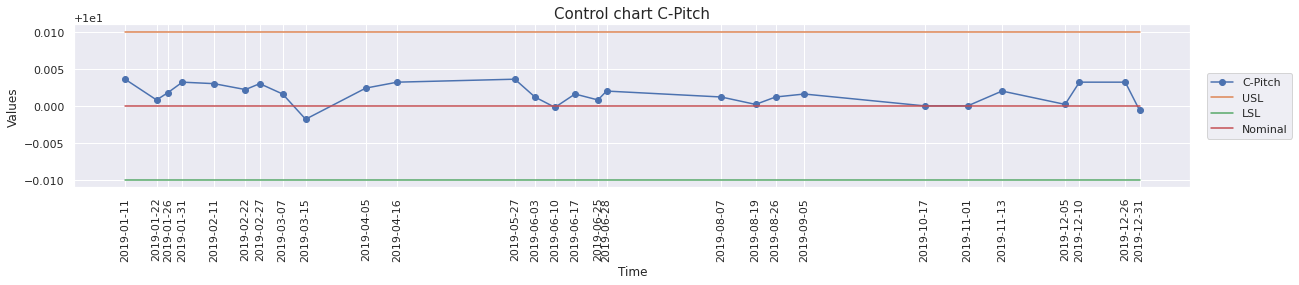

In [ ]:
#setname:
feature=df.columns.values[1]
UCL=df.columns.values[2]
LCL=df.columns.values[3]
Nominal=df.columns.values[4]

fig, ax = plt.subplots(figsize=(20,3))

df.plot(x='Datef',y=feature, ls='-',marker='o',label=feature,ax=ax) #Dimension
df.plot(x='Datef',y=UCL,ls= '-',label=UCL,ax=ax)#UCL
df.plot(x='Datef',y=LCL,ls= '-',label=LCL,ax=ax)#LCL
df.plot(x='Datef',y=Nominal,ls= '-',label=Nominal,ax=ax)#Nominal

plt.gca().set_xticks(df['Datef'])
plt.gca().set_xticklabels(df['Datef'],rotation=90)
plt.gca().set_title('Control chart '+feature,fontsize=15)
plt.gca().legend(loc ='center left',bbox_to_anchor=(1.01, 0.5))

plt.xlabel('Time')
plt.ylabel('Values')

In [ ]:
import altair as alt
df['Datef']=pd.to_datetime(df['Datef'])

In [ ]:
df[:3]

,Datef,C-Pitch,USL,LSL,Nominal
0,2019-01-11,10.0036,10.01,9.99,10.0
1,2019-01-22,10.0008,10.01,9.99,10.0
2,2019-01-26,10.0018,10.01,9.99,10.0


## Prepare data for Altair

In [ ]:
df[:3]

,Datef,C-Pitch,USL,LSL,Nominal
0,2019-01-11,10.0036,10.01,9.99,10.0
1,2019-01-22,10.0008,10.01,9.99,10.0
2,2019-01-26,10.0018,10.01,9.99,10.0


In [ ]:
df_a=pd.concat([df['C-Pitch'],df['USL'],df['LSL'],df['Nominal']])
df_a=df_a.to_frame()
df_a.reset_index(drop=True,inplace=True)

#Create column Date * number of features
df_a_date=pd.DataFrame()
for i in range(4):
  df_a_date=pd.concat([df_a_date,df['Datef']])
df_a_date.reset_index(drop=True,inplace=True)

#Create column category of features
df_a_category=pd.DataFrame()
newlist=[]
a=pd.Series('C-Pitch')
newlist.append(a)
b=pd.Series('USL')
newlist.append(b)
c=pd.Series('LSL')
newlist.append(c)
d=pd.Series('Nominal')
newlist.append(d)

for name in newlist:
  for i in range(len(df['C-Pitch'])):
    df_a_category=pd.concat([df_a_category,name])

df_a_category.reset_index(drop=True,inplace=True)

#Combine all to one data frame( Date as x value, [C-Pitch ,USL,LSL,Nominal] value as y value,  [(C-Pitch,USL, LSL, Nominal) name as Category
df_altair=pd.concat([df_a_date,df_a,df_a_category],axis=1)
df_altair.columns=['Datef','Value','Category']
#df_altair['Datef']=df_altair['Datef'].dt.date
#df_altair['Datef']=pd.to_datetime(df_altair['Datef'])
df_altair[:3]
  

,Datef,Value,Category
0,2019-01-11,10.0036,C-Pitch
1,2019-01-22,10.0008,C-Pitch
2,2019-01-26,10.0018,C-Pitch


In [ ]:
df_altair.columns

Index(['Datef', 'Value', 'Category'], dtype='object')

### Boxplot

In [ ]:
df_box=DFdict['C-Pitch'] #All values for each features
df_box[:5]

,Datef,C-Pitch,USL,LSL,Nominal
0,2019-01-11,10.003,10.01,9.99,10.0
1,2019-01-11,10.005,10.01,9.99,10.0
2,2019-01-11,10.005,10.01,9.99,10.0
3,2019-01-11,10.002,10.01,9.99,10.0
4,2019-01-11,10.003,10.01,9.99,10.0


In [ ]:
df_box['Datef'][0]
#Convert date and time to date:
df_box['Datef']=df_box['Datef'].dt.date
df_box['Datef'][0]

datetime.date(2019, 1, 11)

In [ ]:
df_box_line=df_box.groupby('Datef').mean()#Group values for line chart
df_box_line.reset_index(inplace=True)
df_box_line.tail()

,Datef,C-Pitch,USL,LSL,Nominal
23,2019-11-13,10.0020,10.01,9.99,10.0
24,2019-12-05,10.0002,10.01,9.99,10.0
25,2019-12-10,10.0032,10.01,9.99,10.0
26,2019-12-26,10.0032,10.01,9.99,10.0
27,2019-12-31,9.9994,10.01,9.99,10.0


In [ ]:
df_box_line['Datef'][0]

datetime.date(2019, 1, 11)

Text(0, 0.5, 'Values')

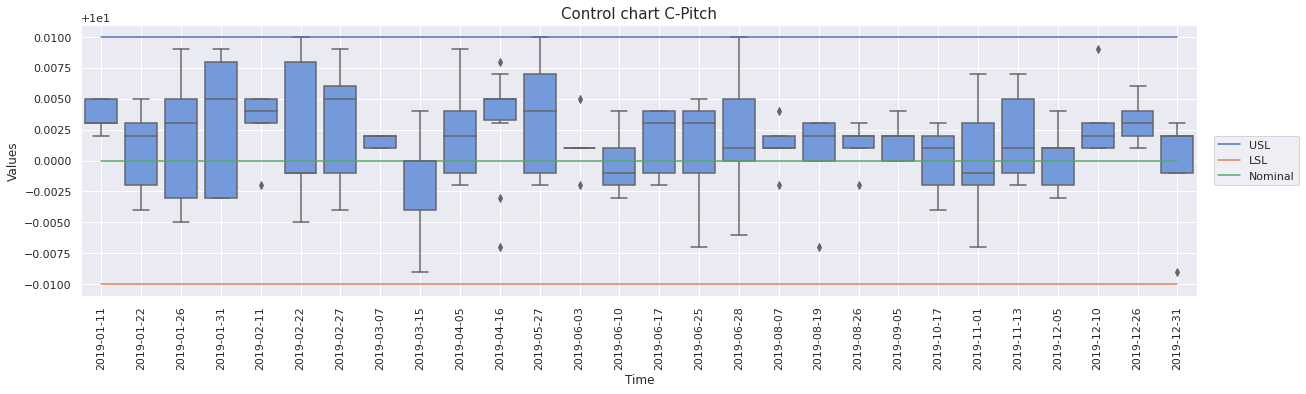

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
sns.boxplot(x='Datef',y='C-Pitch',data=df_box,ax=ax,color='cornflowerblue') 
#df_box.boxplot(column='C-Pitch',by='Datef',ax=ax)#df_box: data with no group by date
df_box_line.plot(y='USL',kind='line',ax=ax) #df_box_line: data with group by date
df_box_line.plot(y='LSL',kind='line',ax=ax)
df_box_line.plot(y='Nominal',kind='line',ax=ax)

#plt.gca().set_xticks(df_box_line['Datef'])
plt.gca().set_xticklabels(df_box_line['Datef'],rotation=90)
plt.gca().set_title('Control chart '+feature,fontsize=15)
plt.gca().legend(loc ='center left',bbox_to_anchor=(1.01, 0.5))

plt.xlabel('Time')
plt.ylabel('Values')